In [1]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG16, DenseNet121, InceptionV3, VGG19, Xception
from tensorboard import notebook
from tensorflow import keras
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory

2023-12-08 01:11:25.791084: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


100%|██████████| 186/186 [00:00<00:00, 195.80it/s]


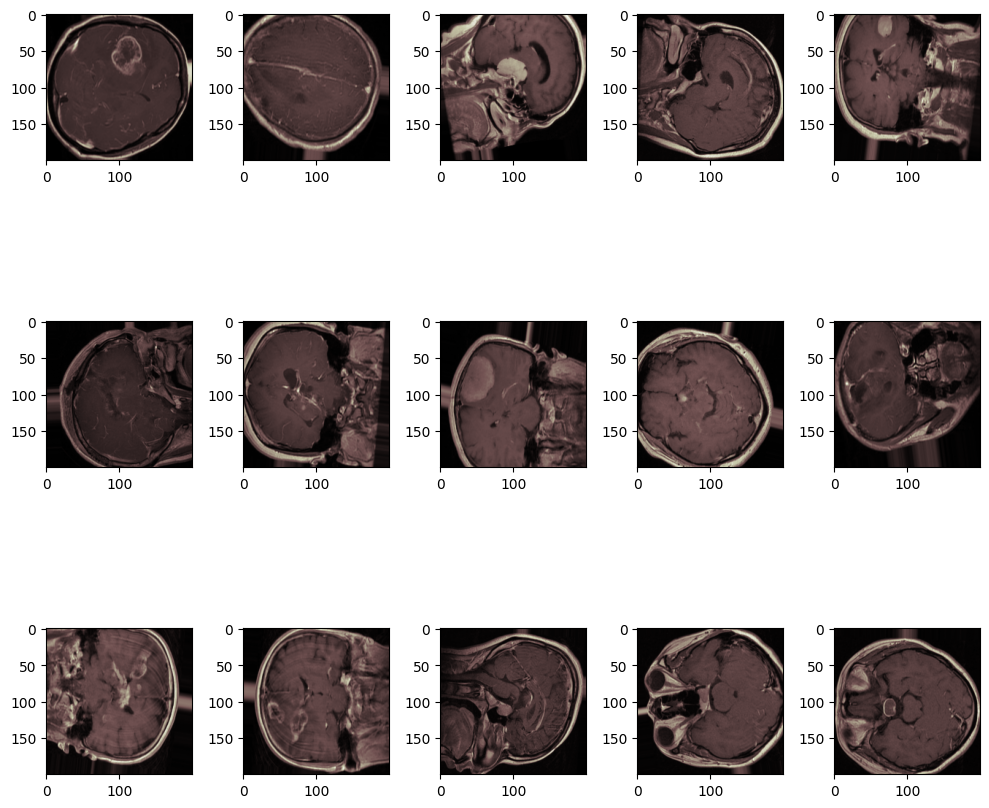

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)


In [2]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [3]:
net = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))

model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)

adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

2023-12-07 21:17:00.253069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 21:17:00.600134: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:42:00.0, compute capability: 8.9


In [4]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-VGG16.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])

Epoch 1/50


2023-12-07 21:17:12.659416: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-07 21:17:13.197957: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-12-07 21:17:13.197995: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-12-07 21:17:13.198184: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-07 21:17:13.975192: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 1.0972 - accuracy: 0.3532
Epoch 1: saving model to model-VGG16.h5
Epoch 1: 23.87 seconds
264/264 [==============================] - 24s 76ms/step - loss: 1.0972 - accuracy: 0.3532 - val_loss: 1.0987 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0139 - accuracy: 0.4597
Epoch 2: saving model to model-VGG16.h5
Epoch 2: 18.70 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.0139 - accuracy: 0.4595 - val_loss: 1.0608 - val_accuracy: 0.3577 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.9002 - accuracy: 0.5293
Epoch 3: saving model to model-VGG16.h5
Epoch 3: 18.73 seconds
264/264 [==============================] - 19s 71ms/step - loss: 0.9000 - accuracy: 0.5292 - val_loss: 0.8695 - val_accuracy: 0.5702 - lr: 1.0000e-04
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 0.8198 - accur

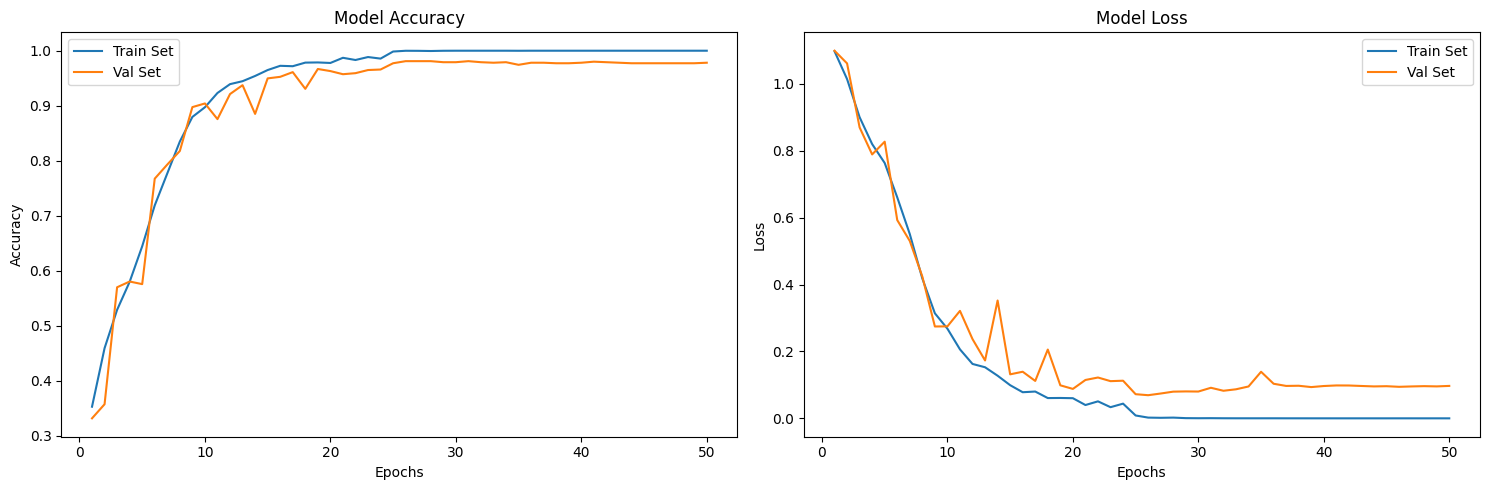

In [5]:
draw_curve(history)

20/20 [==============================] - 0s 21ms/step - loss: 0.3389 - accuracy: 0.9528
Test Accuracy:  95.28
              precision    recall  f1-score   support

      glioma     0.9336    0.9825    0.9574       286
  meningioma     0.9683    0.8592    0.9104       142
   pituitary     0.9733    0.9785    0.9759       186

    accuracy                         0.9528       614
   macro avg     0.9584    0.9401    0.9479       614
weighted avg     0.9536    0.9528    0.9521       614



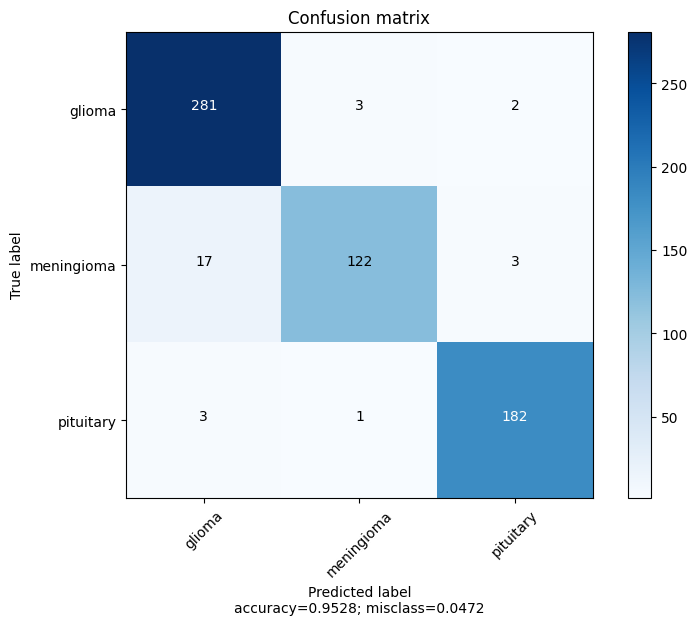

In [6]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

In [7]:
%reset -f

100%|██████████| 186/186 [00:00<00:00, 196.70it/s]


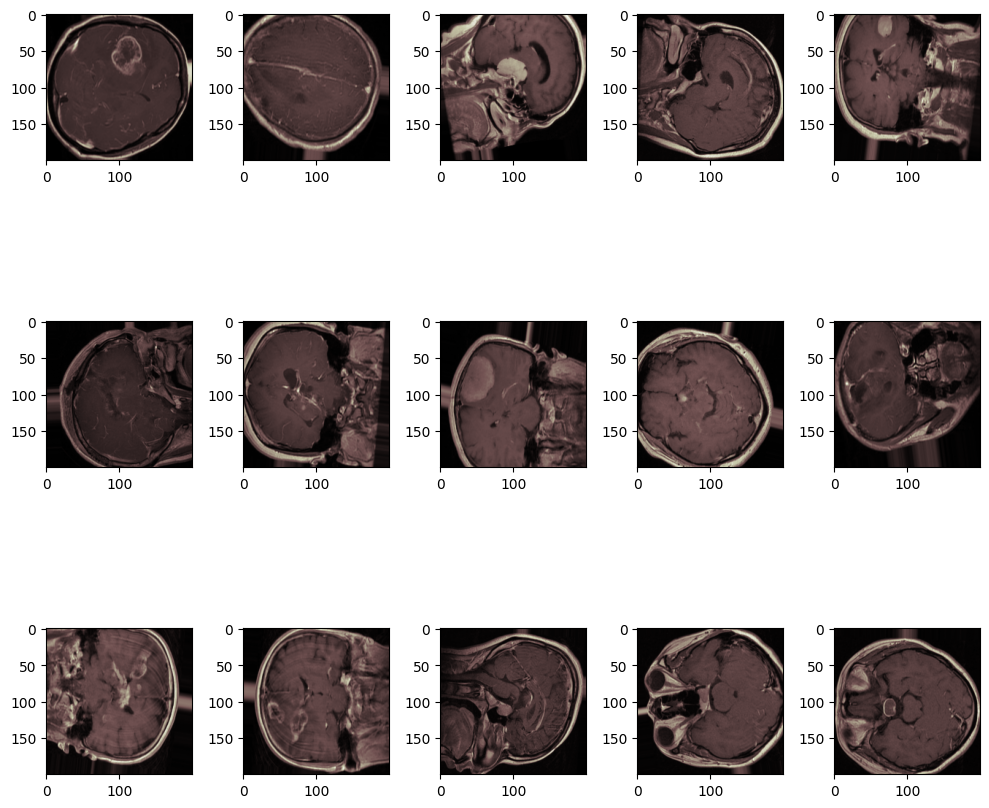

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 1.0971 - accuracy: 0.3534
Epoch 1: saving model to model-VGG16.h5
Epoch 1: 19.69 seconds
264/264 [==============================] - 20s 73ms/step - loss: 1.0971 - accuracy: 0.3533 - val_loss: 1.0993 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.1022 - accuracy: 0.3617
Epoch 2: saving model to model-VGG16.h5
Epoch 2: 18.70 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.1022 - accuracy: 0.3617 - val_loss: 1.0847 - val_accuracy: 0.3378 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.9791 - accuracy: 0.4822
Epoch 3: saving model to model-VGG16.h5
Epoch 3: 18.81 seconds
264/264 [==============================] - 19s 71ms/step - loss: 0.9791 - accuracy: 0.4819 - val_loss: 0.8534 - val_accuracy: 0.5607 - lr: 1.0000e-04
Epoch 4/50
26

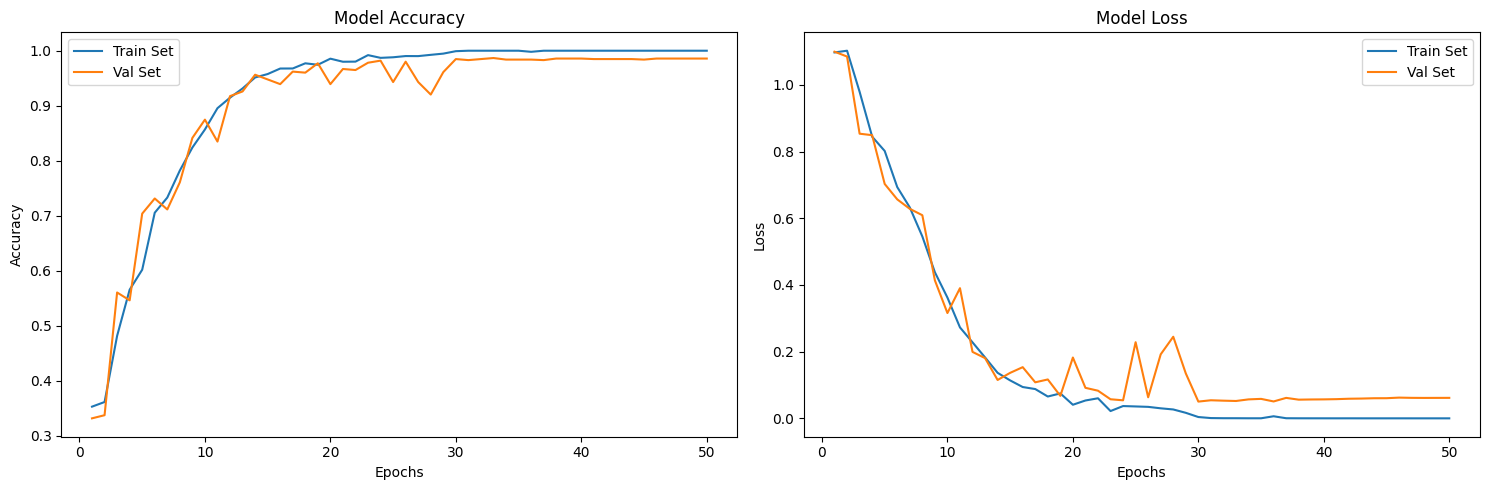

20/20 [==============================] - 0s 22ms/step - loss: 0.2688 - accuracy: 0.9609
Test Accuracy:  96.09
              precision    recall  f1-score   support

      glioma     0.9617    0.9650    0.9634       286
  meningioma     0.9291    0.9225    0.9258       142
   pituitary     0.9839    0.9839    0.9839       186

    accuracy                         0.9609       614
   macro avg     0.9582    0.9571    0.9577       614
weighted avg     0.9609    0.9609    0.9609       614



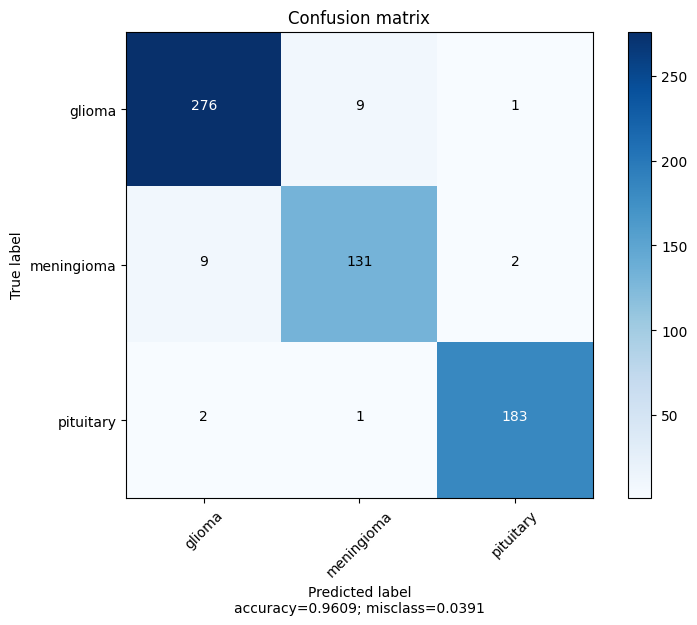

In [10]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-VGG16.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f


100%|██████████| 186/186 [00:00<00:00, 193.82it/s]


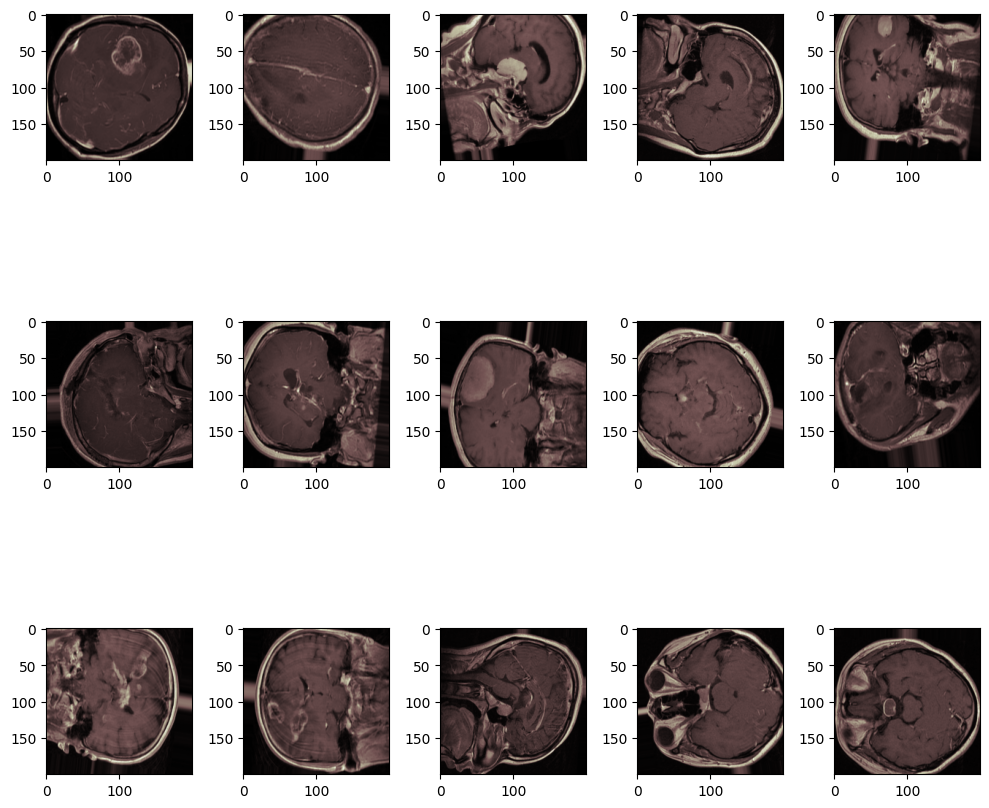

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)


2023-12-07 22:48:35.895261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 22:48:36.203304: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/50


2023-12-07 22:48:43.088938: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-07 22:48:43.665180: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-12-07 22:48:43.665219: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-12-07 22:48:43.665412: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-07 22:48:44.480573: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 1.0984 - accuracy: 0.3506
Epoch 1: saving model to model-VGG16.h5
Epoch 1: 24.18 seconds
264/264 [==============================] - 24s 76ms/step - loss: 1.0984 - accuracy: 0.3506 - val_loss: 1.0989 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0979 - accuracy: 0.3552
Epoch 2: saving model to model-VGG16.h5
Epoch 2: 18.84 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.0979 - accuracy: 0.3554 - val_loss: 1.0993 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 1.0977 - accuracy: 0.3552
Epoch 3: saving model to model-VGG16.h5
Epoch 3: 18.85 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.0977 - accuracy: 0.3554 - val_loss: 1.1000 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 1.0976 - accur

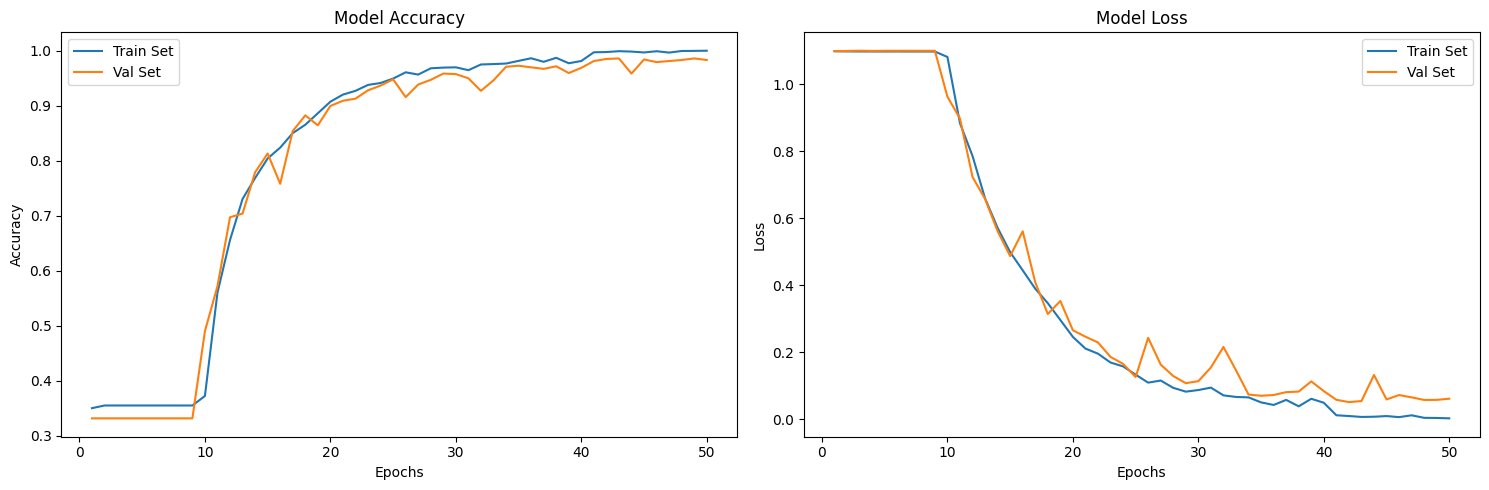

20/20 [==============================] - 0s 22ms/step - loss: 0.2051 - accuracy: 0.9560
Test Accuracy:  95.6
              precision    recall  f1-score   support

      glioma     0.9683    0.9615    0.9649       286
  meningioma     0.9214    0.9085    0.9149       142
   pituitary     0.9632    0.9839    0.9734       186

    accuracy                         0.9560       614
   macro avg     0.9510    0.9513    0.9511       614
weighted avg     0.9559    0.9560    0.9559       614



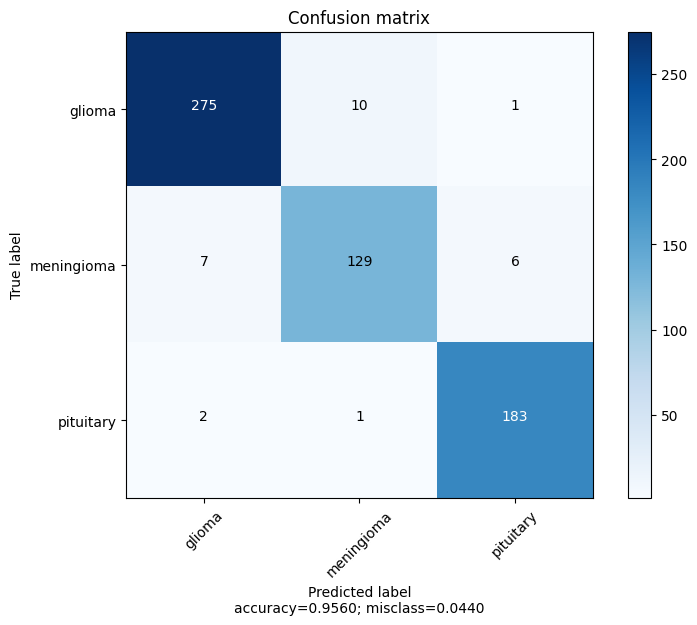

In [2]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-VGG16.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 192.57it/s]


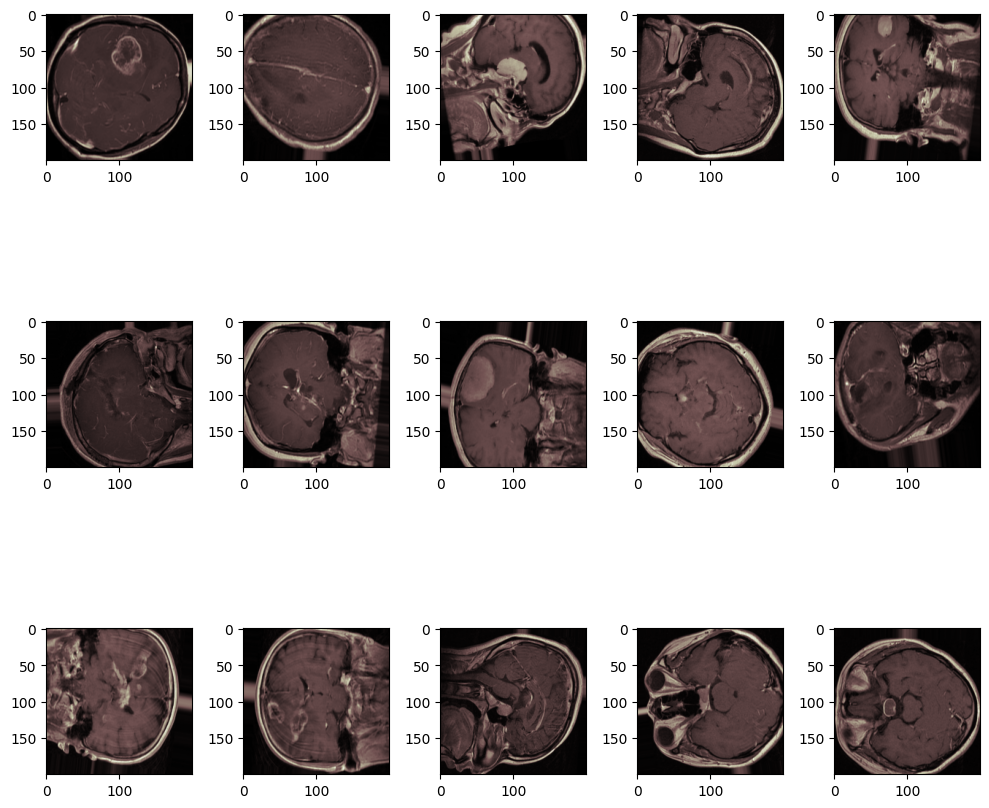

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 1.0974 - accuracy: 0.3521
Epoch 1: saving model to model-VGG16.h5
Epoch 1: 20.61 seconds
264/264 [==============================] - 21s 73ms/step - loss: 1.0974 - accuracy: 0.3521 - val_loss: 1.0986 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0957 - accuracy: 0.3612
Epoch 2: saving model to model-VGG16.h5
Epoch 2: 18.84 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.0957 - accuracy: 0.3612 - val_loss: 1.0980 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 1.0826 - accuracy: 0.3781
Epoch 3: saving model to model-VGG16.h5
Epoch 3: 18.86 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.0825 - accuracy: 0.3781 - val_loss: 0.9566 - val_accuracy: 0.5275 - lr: 1.0000e-04
Epoch 4/50
26

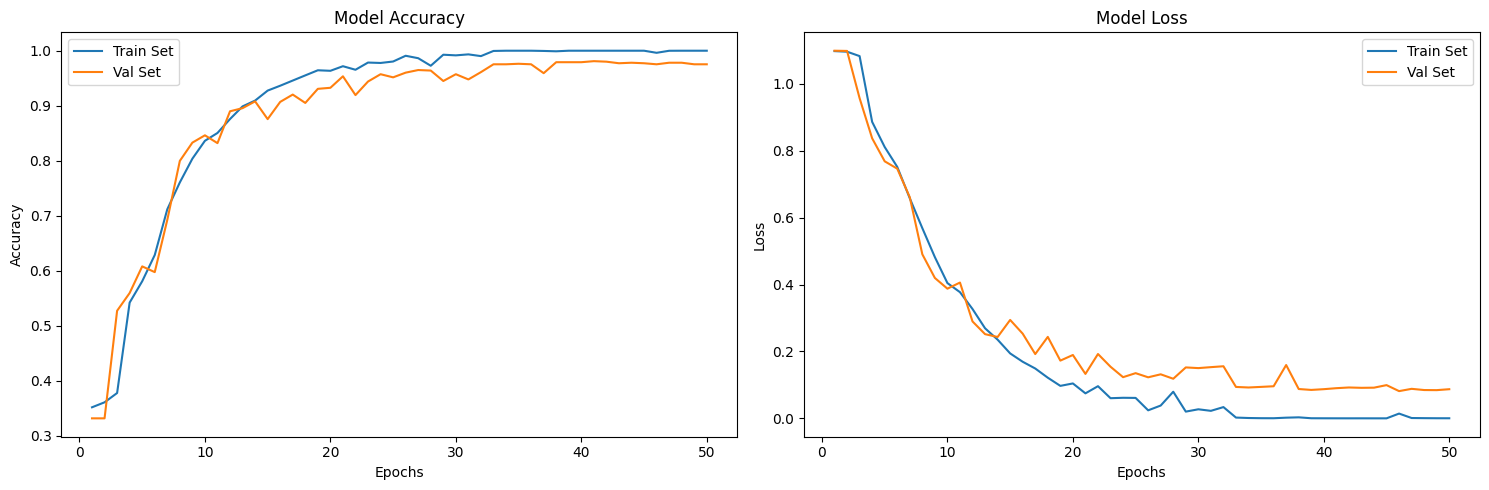

20/20 [==============================] - 0s 22ms/step - loss: 0.3424 - accuracy: 0.9332
Test Accuracy:  93.32
              precision    recall  f1-score   support

      glioma     0.9479    0.9545    0.9512       286
  meningioma     0.8971    0.8592    0.8777       142
   pituitary     0.9368    0.9570    0.9468       186

    accuracy                         0.9332       614
   macro avg     0.9273    0.9236    0.9252       614
weighted avg     0.9328    0.9332    0.9329       614



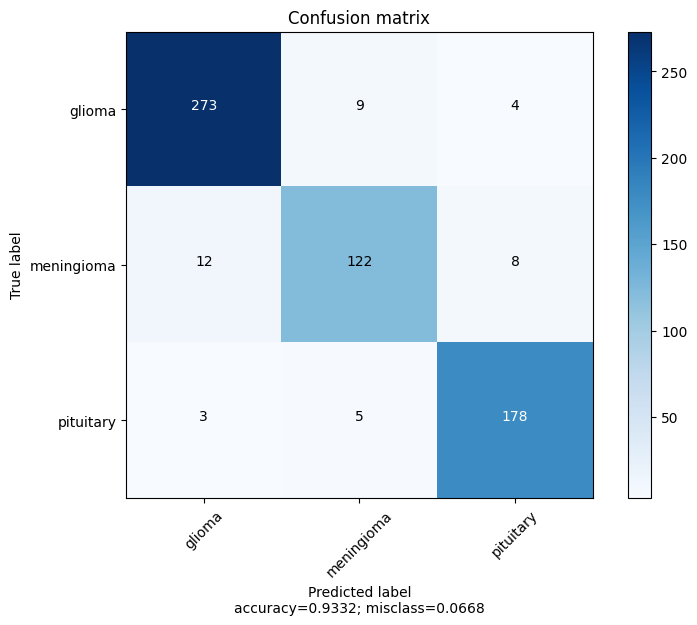

In [4]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-VGG16.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 195.40it/s]


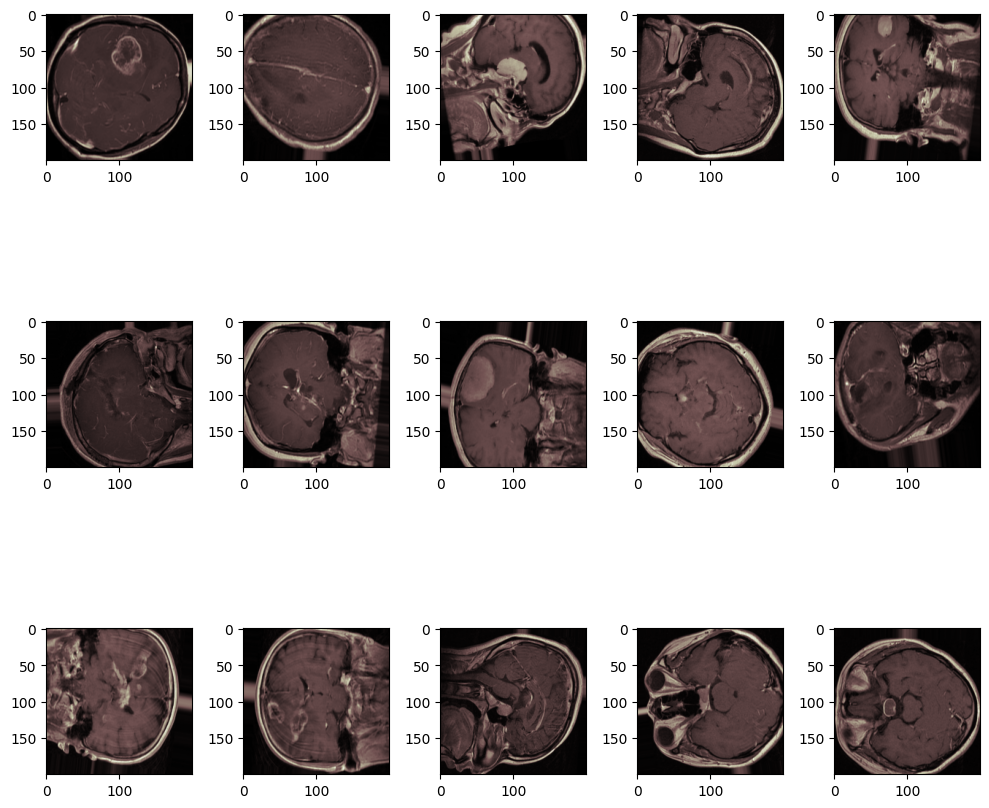

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)


2023-12-08 01:12:31.066864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 01:12:31.374603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/50


2023-12-08 01:12:38.305675: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-08 01:12:38.888008: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-12-08 01:12:38.888045: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-12-08 01:12:38.888242: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-08 01:12:39.701387: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 1.0947 - accuracy: 0.3547
Epoch 1: saving model to model-VGG16.h5
Epoch 1: 24.27 seconds
264/264 [==============================] - 24s 77ms/step - loss: 1.0947 - accuracy: 0.3547 - val_loss: 1.0989 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0974 - accuracy: 0.3567
Epoch 2: saving model to model-VGG16.h5
Epoch 2: 18.82 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.0974 - accuracy: 0.3566 - val_loss: 1.0987 - val_accuracy: 0.3359 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 1.0954 - accuracy: 0.3517
Epoch 3: saving model to model-VGG16.h5
Epoch 3: 18.81 seconds
264/264 [==============================] - 19s 71ms/step - loss: 1.0954 - accuracy: 0.3519 - val_loss: 1.0987 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 1.0312 - accur

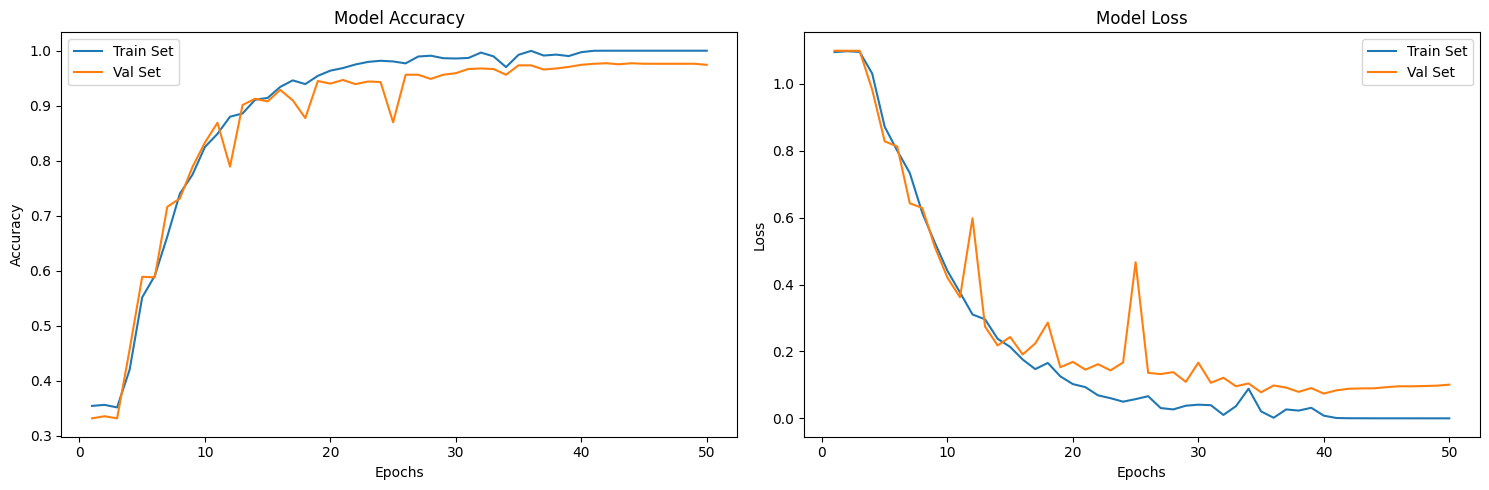

20/20 [==============================] - 0s 22ms/step - loss: 0.3507 - accuracy: 0.9463
Test Accuracy:  94.63
              precision    recall  f1-score   support

      glioma     0.9521    0.9720    0.9619       286
  meningioma     0.9242    0.8592    0.8905       142
   pituitary     0.9526    0.9731    0.9628       186

    accuracy                         0.9463       614
   macro avg     0.9430    0.9348    0.9384       614
weighted avg     0.9458    0.9463    0.9457       614



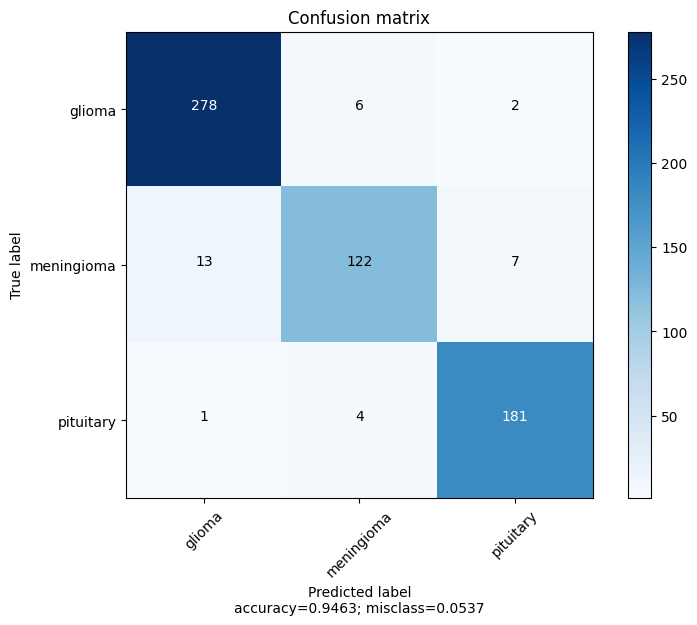

In [2]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-VGG16.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)